## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/travel_cleaned.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup,IncomeGroup
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50,20000-25000
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,41-50,20000-25000
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40,<20000
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-40,<20000
4,200004,0,34.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,31-40,<20000


In [3]:
#fix category orders
prod_order = ['Basic','Standard', 'Deluxe','Super Deluxe', 'King']
desig_order =['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP']
age_order = ['<20','20-30','31-40','41-50','51+']
income_order = ['<20000', '20000-25000', '25000-30000', '30000-35000', '35000-40000', '40000+']

df['ProductPitched'] =pd.Categorical(df['ProductPitched'], categories = prod_order, ordered=True)
df['Designation'] =pd.Categorical(df['Designation'], categories = desig_order, ordered=True)
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=age_order, ordered=True)
df['IncomeGroup'] = pd.Categorical(df['IncomeGroup'], categories=income_order, ordered=True)


## Distribution of Purchased Travel Packages

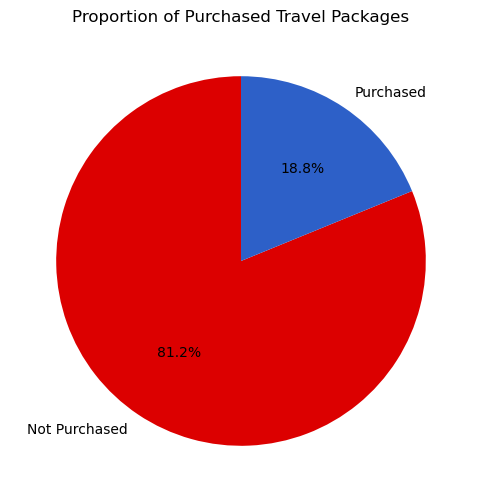

In [4]:
#ProdTaken Proportion
target_counts = df['ProdTaken'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Not Purchased', 'Purchased'], autopct="%1.1f%%", startangle=90, colors=["#DC0000", "#2D60C8"])
plt.title('Proportion of Purchased Travel Packages')
plt.show()

**Insight:** The percentage of people purchasing the product (18.8%) is less than those who do not (81.2%). Therefore, key factors driving purchase behaviour need to be identified, and a more targeted marketing approach needs to be implemented.

### Factors Influencing Customer Purchasing Behaviour

In [5]:
df_purchased = df[df['ProdTaken'] == 1]

ProdTaken                0          1
TypeofContact                        
Company Invited  78.105263  21.894737
Self Enquiry     82.442969  17.557031


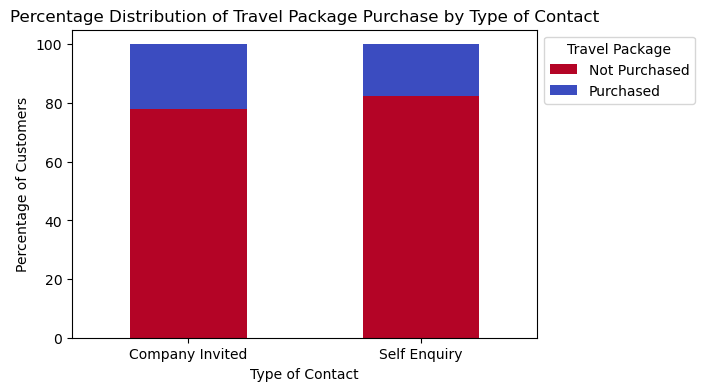

In [45]:
contact = pd.crosstab(df['TypeofContact'],df['ProdTaken'],normalize='index')*100
print(contact)
contact.plot(kind='bar', stacked = 'True', figsize =(6,4),
             title='Percentage Distribution of Travel Package Purchase by Type of Contact',
             colormap='coolwarm_r')
plt.xlabel('Type of Contact')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

ProdTaken               0          1
ProductPitched                      
Basic           70.032573  29.967427
Standard        83.288410  16.711590
Deluxe          88.221709  11.778291
Super Deluxe    94.152047   5.847953
King            91.304348   8.695652


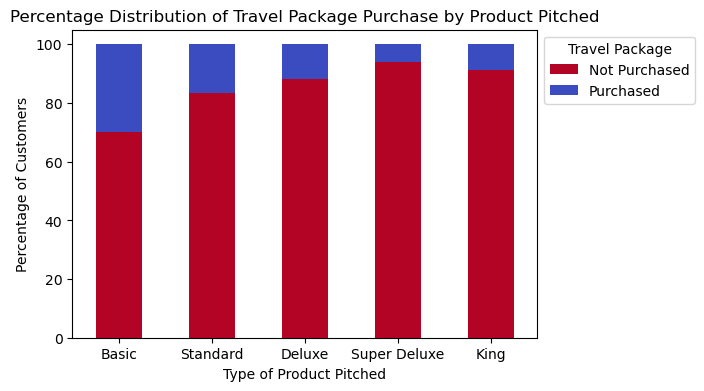

In [51]:
prodpitched = pd.crosstab(df['ProductPitched'],df['ProdTaken'],normalize='index')*100
print(prodpitched)
order = ['Basic', 'Standard', 'Deluxe', 'Super Deluxe', 'King']
prodpitched.loc[order].plot(kind='bar', stacked=True, figsize=(6,4),
    title='Percentage Distribution of Travel Package Purchase by Product Pitched',
    colormap = 'coolwarm_r')
plt.xlabel('Type of Product Pitched')
plt.xticks(rotation=360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))


**Insight:** More customers bought the travel package, when pitched the basic product compared to the Super Deluxe and the King. The basic package resonates more with the majority of customers, potentially due to its perceived affordability and suitability for a wider audience.

ProdTaken          0          1
CityTier                       
1          83.699060  16.300940
2          76.767677  23.232323
3          76.400000  23.600000


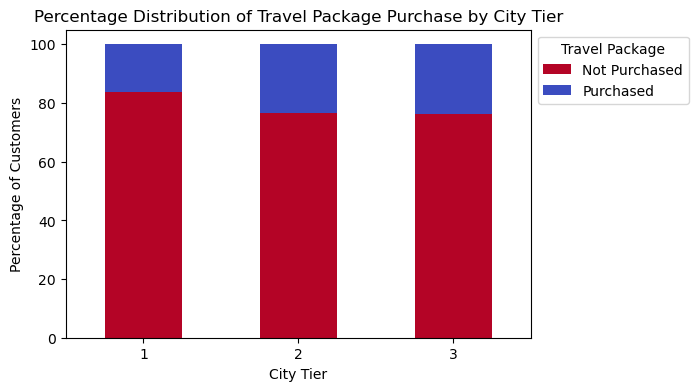

In [8]:
city = pd.crosstab(df['CityTier'],df['ProdTaken'],normalize='index')*100
print(city)
city.plot(kind='bar', stacked = 'True', figsize =(6,4),
          title='Percentage Distribution of Travel Package Purchase by City Tier',
          colormap='coolwarm_r')
plt.xlabel('City Tier')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insights:** City Tier 1 has the lowest conversion rate, while City Tier 3 has the highest conversion rate 23.7% said yes to the product.
This suggests that people in less urban areas or City Tier 3 may be more receptive to the travel product.

/var/folders/90/fy16vq9n2c1_hx322b65_2xw0000gn/T/ipykernel_20680/605708257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'ProdTaken', y='DurationOfPitch', palette=custom_palette)


([<matplotlib.axis.XTick at 0x17739fc80>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

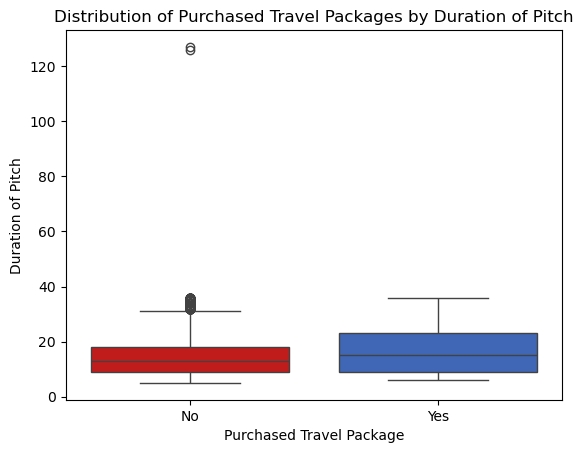

In [9]:
custom_palette = {'0': "#DC0000", '1': "#2D60C8"}
sns.boxplot(data=df, x = 'ProdTaken', y='DurationOfPitch', palette=custom_palette)
plt.title('Distribution of Purchased Travel Packages by Duration of Pitch')
plt.ylabel('Duration of Pitch')
plt.xlabel('Purchased Travel Package')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

**Insight:** Customers who bought a travel packages benefitted from a slightly longer duration of pitch.

ProdTaken               0           1
Occupation                           
Free Lancer      0.000000  100.000000
Large Business  72.350230   27.649770
Salaried        82.516892   17.483108
Small Business  81.573896   18.426104


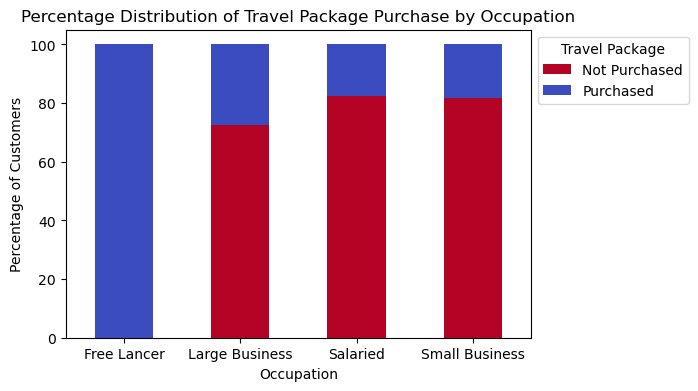

In [10]:
occ = pd.crosstab(df['Occupation'],df['ProdTaken'],normalize='index')*100
print(occ)
occ.plot(kind='bar', stacked = 'True', figsize =(6,4),
         title='Percentage Distribution of Travel Package Purchase by Occupation',
         colormap='coolwarm_r')
plt.xlabel('Occupation')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insights:** Free Lancers and Large Business Owners were more likely to buy the travel packages.

ProdTaken          0          1
Gender                         
Female     82.657201  17.342799
Male       80.178326  19.821674


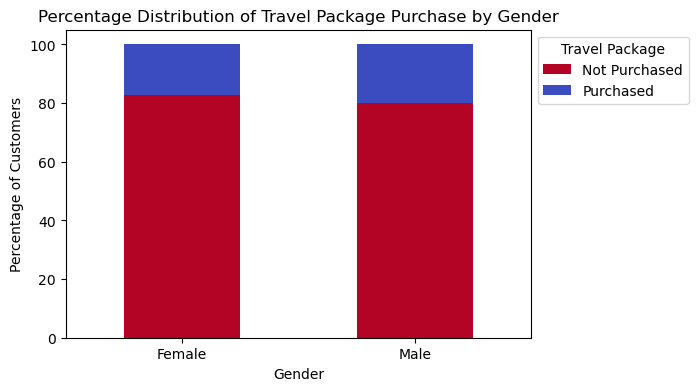

In [11]:
gender = pd.crosstab(df['Gender'],df['ProdTaken'],normalize='index')*100
print(gender)
gender.plot(kind='bar', stacked = 'True', figsize =(6,4),
             title='Percentage Distribution of Travel Package Purchase by Gender',
             colormap='coolwarm_r')
plt.xlabel('Gender')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Both genders had an almost equal chances of buying the travel packages.

ProdTaken                        0          1
NumberOfPersonVisiting                       
1                       100.000000   0.000000
2                        81.170663  18.829337
3                        80.849292  19.150708
4                        81.189084  18.810916
5                       100.000000   0.000000


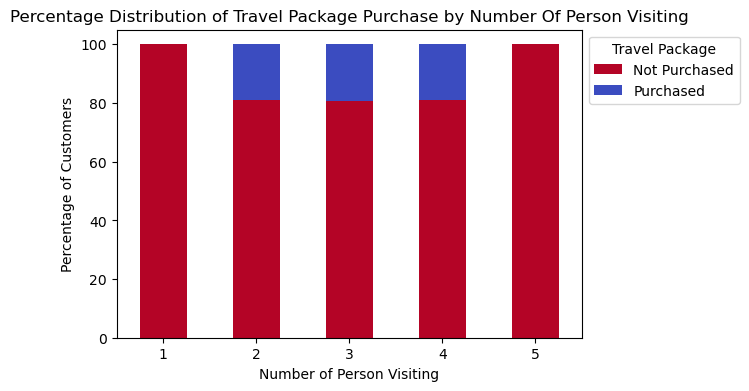

In [12]:
personvisit = pd.crosstab(df['NumberOfPersonVisiting'],df['ProdTaken'],normalize='index')*100
print(personvisit)
personvisit.plot(kind='bar', stacked = 'True', figsize =(6,4),
                 title='Percentage Distribution of Travel Package Purchase by Number Of Person Visiting',
                 colormap='coolwarm_r')
plt.xlabel('Number of Person Visiting')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** All the customers who bought the travel package were either traveling with 2, 3 or 4 other people.

ProdTaken                  0          1
NumberOfFollowups                      
0.0                82.222222  17.777778
1.0                88.636364  11.363636
2.0                89.519651  10.480349
3.0                83.356071  16.643929
4.0                81.673114  18.326886
5.0                75.130208  24.869792
6.0                60.294118  39.705882


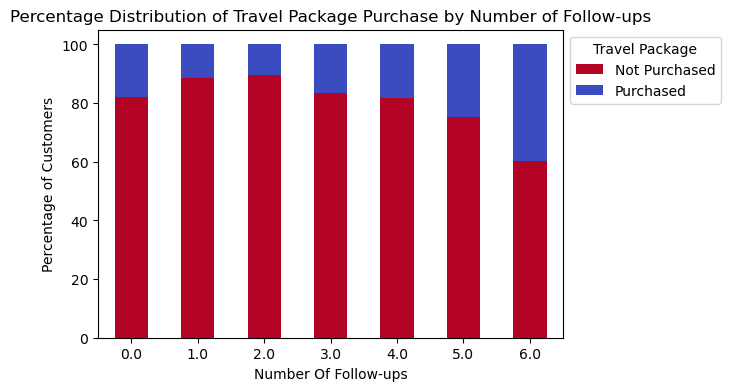

In [13]:
numberfollup = pd.crosstab(df['NumberOfFollowups'],df['ProdTaken'],normalize='index')*100
print(numberfollup)
numberfollup.plot(kind='bar', stacked = 'True', figsize =(6,4),
                  title='Percentage Distribution of Travel Package Purchase by Number of Follow-ups',
                  colormap='coolwarm_r')
plt.xlabel('Number Of Follow-ups')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Customers with more number of follow ups were more likely to purchase a travel package. Increased engagement from the sales team positively impacts customer decisions, indicating that persistent follow-up efforts may play a significant role in converting potential leads into actual buyers.

ProdTaken                      0          1
PreferredPropertyStar                      
3.0                    83.835707  16.164293
4.0                    80.065717  19.934283
5.0                    73.849372  26.150628


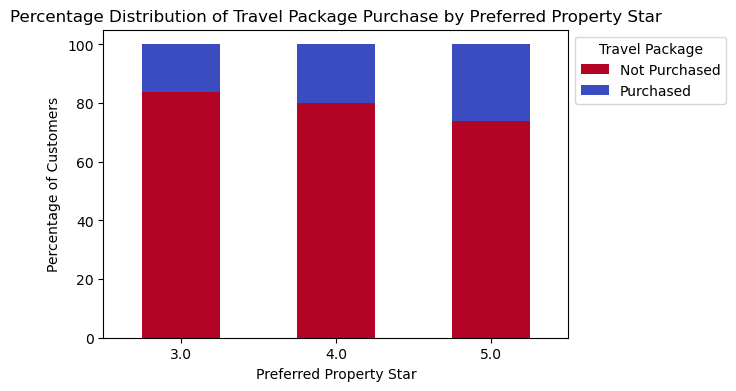

In [14]:
prop = pd.crosstab(df['PreferredPropertyStar'],df['ProdTaken'],normalize='index')*100
print(prop)
prop.plot(kind='bar', stacked = 'True', figsize =(6,4),
          title='Percentage Distribution of Travel Package Purchase by Preferred Property Star',
          colormap='coolwarm_r')
plt.xlabel('Preferred Property Star')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Most customers preferred a property rating of 5 star, compared to the lower ratings,  but not much significant difference.

ProdTaken              0          1
MaritalStatus                      
Divorced       86.947368  13.052632
Married        86.068376  13.931624
Single         66.812227  33.187773
Unmarried      75.659824  24.340176


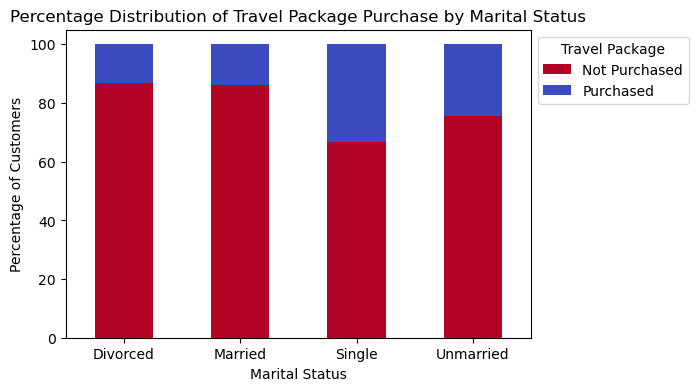

In [15]:
marry = pd.crosstab(df['MaritalStatus'],df['ProdTaken'],normalize='index')*100
print(marry)
marry.plot(kind='bar', stacked = 'True', figsize =(6,4),
           title='Percentage Distribution of Travel Package Purchase by Marital Status',
           colormap='coolwarm_r')
plt.xlabel('Marital Status')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Single and unmarried customers were more likely to purchase travel packages compared to married or divorced customers, probably due to different preferences in travelling experiences.

ProdTaken               0           1
NumberOfTrips                        
1.0             81.935484   18.064516
2.0             79.576503   20.423497
3.0             81.214110   18.785890
4.0             87.238494   12.761506
5.0             86.462882   13.537118
6.0             80.124224   19.875776
7.0             71.559633   28.440367
8.0             72.380952   27.619048
19.0             0.000000  100.000000
20.0             0.000000  100.000000
21.0           100.000000    0.000000
22.0           100.000000    0.000000


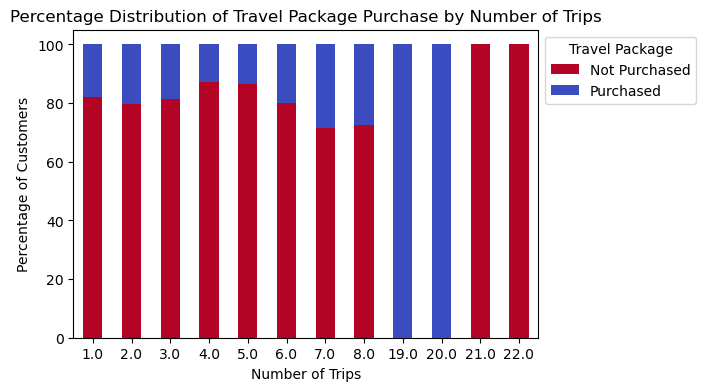

In [16]:
trip = pd.crosstab(df['NumberOfTrips'],df['ProdTaken'],normalize='index')*100
print(trip)
trip.plot(kind='bar', stacked = 'True', figsize =(6,4),
          title='Percentage Distribution of Travel Package Purchase by Number of Trips',
          colormap='coolwarm_r')
plt.xlabel('Number of Trips')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Most customers who bought a travel package usually take 6 - 8 trips annually. This needs to be checked as the 19 & 20 number of trips might be outliers.

ProdTaken          0          1
Passport                       
0          87.709175  12.290825
1          65.260197  34.739803


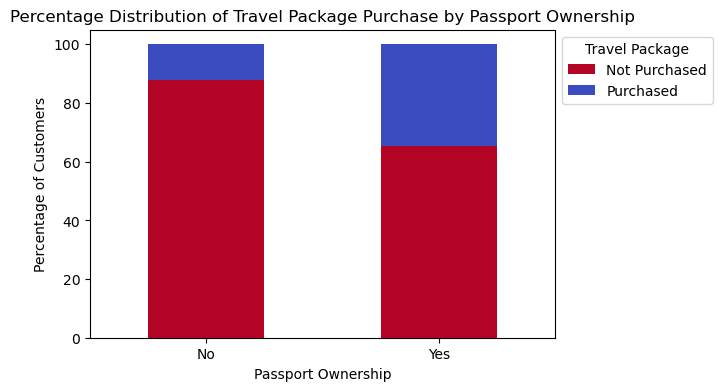

In [17]:
passp = pd.crosstab(df['Passport'],df['ProdTaken'],normalize='index')*100
print(passp)
passp.plot(kind='bar', stacked = 'True', figsize =(6,4),
             title='Percentage Distribution of Travel Package Purchase by Passport Ownership',
             colormap='coolwarm_r')
plt.xlabel('Passport Ownership')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Most customers who bought the travel packages already own a passport.

ProdTaken                       0          1
PitchSatisfactionScore                      
1                       84.713376  15.286624
2                       84.982935  15.017065
3                       78.619756  21.380244
4                       82.236842  17.763158
5                       78.350515  21.649485


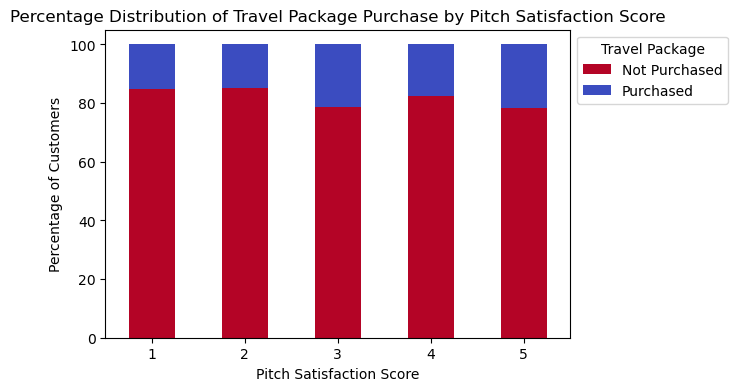

In [18]:
score = pd.crosstab(df['PitchSatisfactionScore'],df['ProdTaken'],normalize='index')*100
print(score)
score.plot(kind='bar', stacked = 'True', figsize =(6,4),
             title='Percentage Distribution of Travel Package Purchase by Pitch Satisfaction Score',
             colormap='coolwarm_r')
plt.xlabel('Pitch Satisfaction Score')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Most customers who bought a travel package scored the product pitch a moderate 3-4 and some score a perfect 5.

ProdTaken          0          1
OwnCar                         
0          80.603448  19.396552
1          81.530343  18.469657


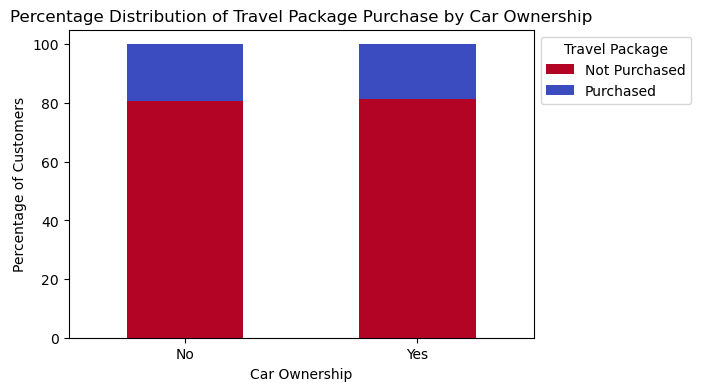

In [19]:
car = pd.crosstab(df['OwnCar'],df['ProdTaken'],normalize='index')*100
print(car)
car.plot(kind='bar', stacked = 'True', figsize =(6,4),
             title='Percentage Distribution of Travel Package Purchase by Car Ownership',
             colormap='coolwarm_r')
plt.xlabel('Car Ownership')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Car ownership does not seem to affect purchasing a travel package.

ProdTaken                         0          1
NumberOfChildrenVisiting                      
0.0                       81.794425  18.205575
1.0                       81.153846  18.846154
2.0                       81.048689  18.951311
3.0                       79.692308  20.307692


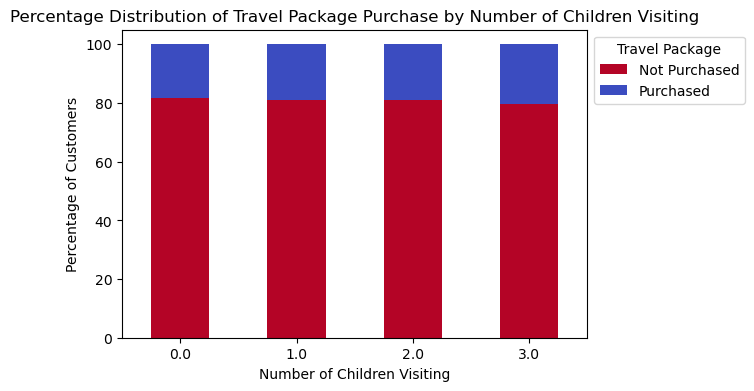

In [20]:
child = pd.crosstab(df['NumberOfChildrenVisiting'],df['ProdTaken'],normalize='index')*100
print(child)
child.plot(kind='bar', stacked = 'True', figsize =(6,4),
             title='Percentage Distribution of Travel Package Purchase by Number of Children Visiting',
             colormap='coolwarm_r')
plt.xlabel('Number of Children Visiting')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** Customers who bought the travel packages are going to bring either 0-3 children, proportionally.

ProdTaken               0          1
Designation                         
Executive       70.032573  29.967427
Manager         88.221709  11.778291
Senior Manager  83.288410  16.711590
AVP             94.152047   5.847953
VP              91.304348   8.695652


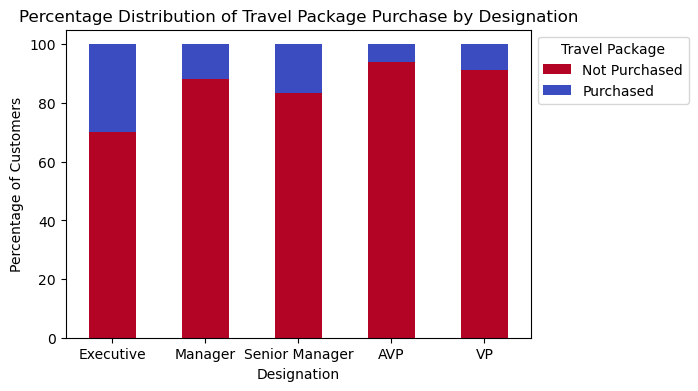

In [21]:
design = pd.crosstab(df['Designation'],df['ProdTaken'],normalize='index')*100
print(design)
design.plot(kind='bar', stacked = 'True', figsize =(6,4),
             title='Percentage Distribution of Travel Package Purchase by Designation',
             colormap='coolwarm_r')
plt.xlabel('Designation')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:** More executives bought the travel packages, followed by Senior Managers. The higher ups were less inclined to buy the travel packages.

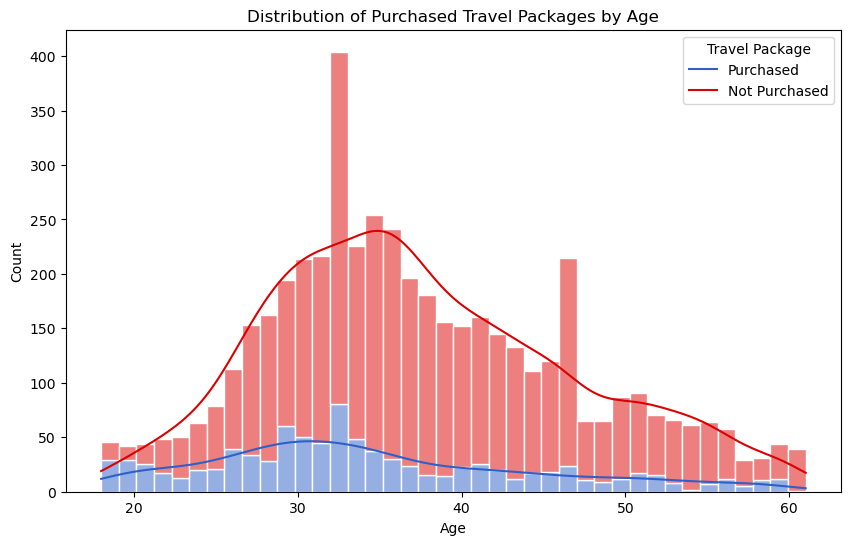

In [22]:
custom_palette2 = {1: "#2D60C8", 0: "#DC0000"}
plt.figure(figsize =(10, 6))
sns.histplot(data=df, x = 'Age', palette=custom_palette2, hue = 'ProdTaken', multiple = 'stack', kde = True, bins = 40, edgecolor='white')
plt.title('Distribution of Purchased Travel Packages by Age')
plt.legend(title='Travel Package', labels=['Purchased','Not Purchased'], bbox_to_anchor=(1,1))

ProdTaken          0          1
AgeGroup                       
<20        34.090909  65.909091
20-30      72.589286  27.410714
31-40      84.353406  15.646594
41-50      86.557675  13.442325
51+        83.725136  16.274864


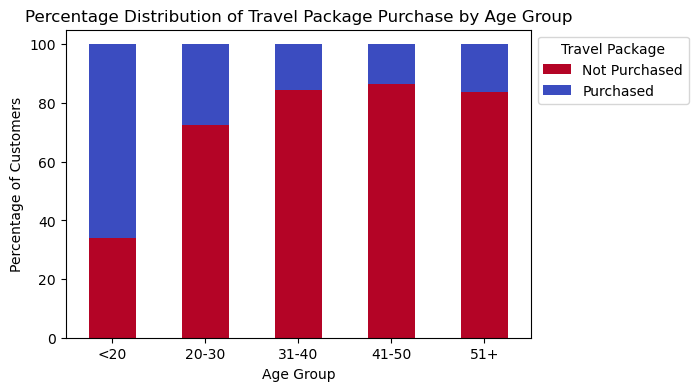

In [23]:
age_gr = pd.crosstab(df['AgeGroup'],df['ProdTaken'],normalize='index')*100
print(age_gr)
age_gr.plot(kind='bar', stacked = 'True', figsize =(6,4),
             title='Percentage Distribution of Travel Package Purchase by Age Group',
             colormap ='coolwarm_r')
plt.xlabel('Age Group')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insights:**

- Most travel package purchases occur in the 25–40 age range, with a significant peak around age 30.
- Most customers who purchased the travel package were those from the younger generations, while the number of customers from the older age group decreases.

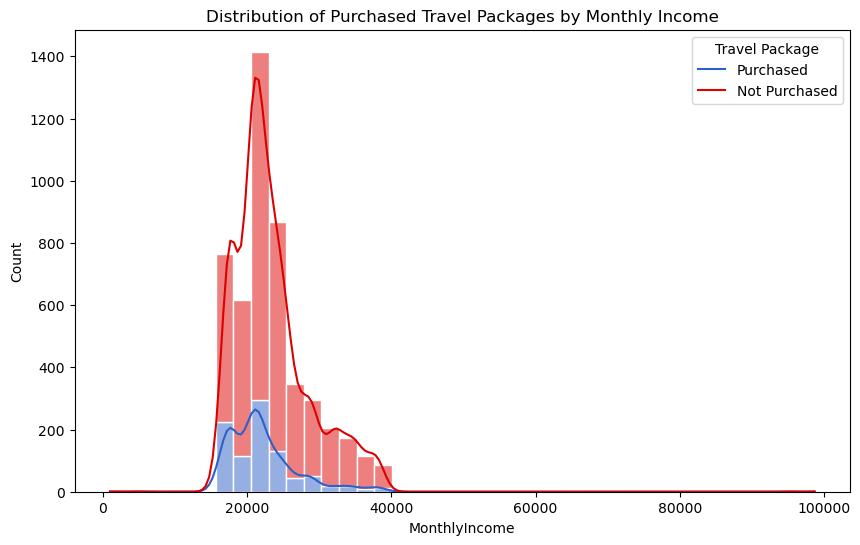

In [24]:
plt.figure(figsize =(10, 6))
sns.histplot(data=df, x = 'MonthlyIncome', palette=custom_palette2, hue = 'ProdTaken', multiple = 'stack', kde = True, bins = 40, edgecolor = 'white')
plt.title('Distribution of Purchased Travel Packages by Monthly Income')
plt.legend(title='Travel Package', labels=['Purchased','Not Purchased'], bbox_to_anchor=(1,1))

ProdTaken             0          1
IncomeGroup                       
<20000        73.706897  26.293103
20000-25000   81.587838  18.412162
25000-30000   84.545455  15.454545
30000-35000   89.790576  10.209424
35000-40000   89.805825  10.194175
40000+       100.000000   0.000000


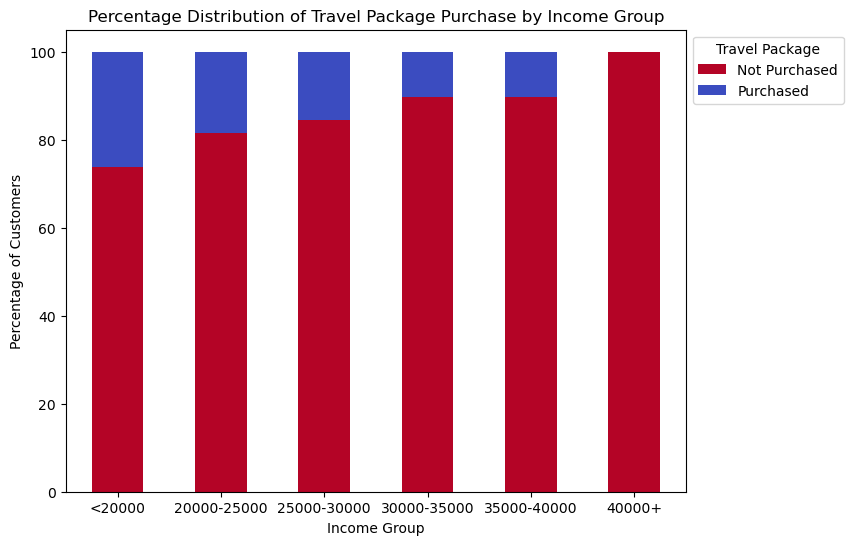

In [25]:
inc_gr = pd.crosstab(df['IncomeGroup'],df['ProdTaken'],normalize='index')*100
print(inc_gr)
inc_gr.plot(kind='bar', stacked = 'True', figsize =(8,6),
             title='Percentage Distribution of Travel Package Purchase by Income Group',
             colormap='coolwarm_r')
plt.xlabel('Income Group')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of Customers')
plt.legend(title='Travel Package', labels=['Not Purchased','Purchased'], bbox_to_anchor=(1,1))

**Insight:**

- Purchases are concentrated in the 15,000–30,000 monthly income range, with a notable peak around 20,000–25,000.
- More customers who purchased the travel package were those int he lower income group (<20000), compared to the higher income groups.

### Customer Profiling (Customers Who Purchased the Travel Packages)

In [26]:
cust_df = df[df['ProdTaken'] == 1]
print(cust_df.shape)
cust_df

(920, 22)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup,IncomeGroup
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,41-50,20000-25000
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,31-40,<20000
14,200014,1,28.0,Self Enquiry,1,30.0,Salaried,Male,2,4.0,Basic,3.0,Single,6.0,1,2,0,0.0,Executive,17028.0,20-30,<20000
21,200021,1,26.0,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0,20-30,<20000
24,200024,1,34.0,Self Enquiry,1,12.0,Small Business,Male,2,3.0,Basic,5.0,Single,3.0,0,2,1,1.0,Executive,17960.0,31-40,<20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,41-50,25000-30000
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,20-30,20000-25000
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,51+,30000-35000
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,<20,20000-25000


/var/folders/90/fy16vq9n2c1_hx322b65_2xw0000gn/T/ipykernel_20680/3330874304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r')


Text(0.5, 0, 'Products Bought')

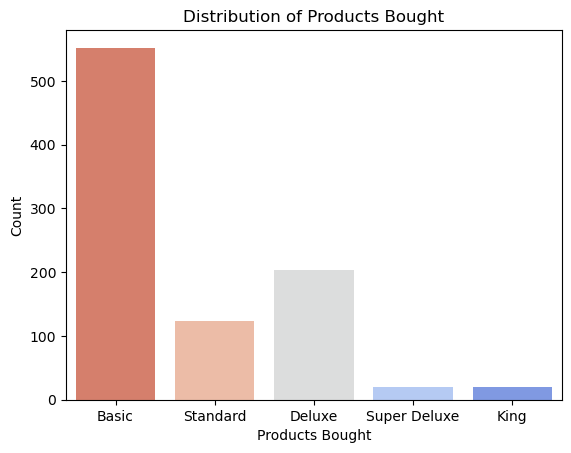

In [27]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r')
plt.title ('Distribution of Products Bought')
plt.ylabel('Count')
plt.xlabel('Products Bought')

**Insight:** Most customers chose the Basic and Deluxe package likely due to their affordability, while Super Deluxe and King options were less popular, possibly reflecting budget constraints or less perceived value.

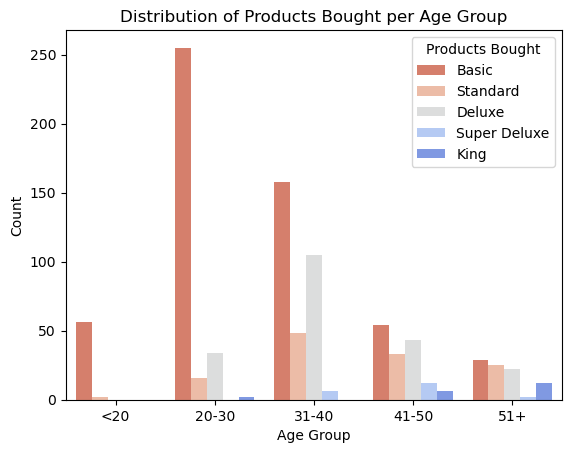

In [28]:
sns.countplot(data=cust_df, x='AgeGroup', palette = 'coolwarm_r', hue = 'ProductPitched')
plt.title ('Distribution of Products Bought per Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Products Bought')

**Insight:** Most of the younger customers opt for the Basic, Standard or Deluxe travel package, possible due to freedom, low cost, and age preferences. While those in the 40 and above age groups can be seen to choose a more relaxed and Super Deluxe or King travel packages, a more all-inclusive, since they can probably afford it more.

/var/folders/90/fy16vq9n2c1_hx322b65_2xw0000gn/T/ipykernel_20680/3900732408.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cust_df, x='ProductPitched', y='Age', palette = 'coolwarm_r', errorbar = None)


Text(0.5, 0, 'Product Bought')

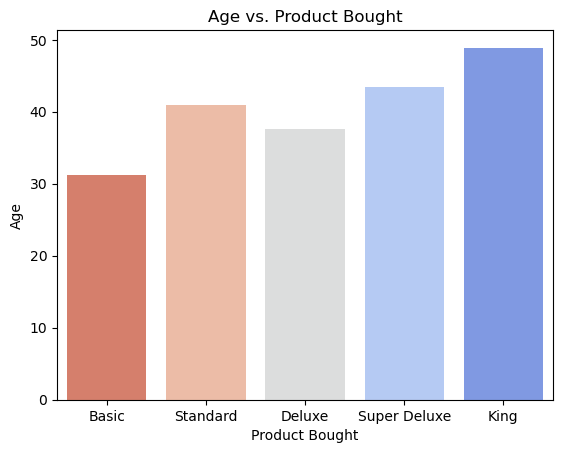

In [29]:
sns.barplot(data=cust_df, x='ProductPitched', y='Age', palette = 'coolwarm_r', errorbar = None)
plt.title ('Age vs. Product Bought')
plt.ylabel('Age')
plt.xlabel('Product Bought')

In [30]:
cust_df.groupby(['ProductPitched']).agg({
    'Age':['mean','min','max']})

/var/folders/90/fy16vq9n2c1_hx322b65_2xw0000gn/T/ipykernel_20680/1709028286.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_df.groupby(['ProductPitched']).agg({


Age            
                     mean   min   max
ProductPitched                       
Basic           31.161232  18.0  59.0
Standard        40.959677  19.0  60.0
Deluxe          37.568627  21.0  59.0
Super Deluxe    43.500000  39.0  56.0
King            48.900000  27.0  59.0

/var/folders/90/fy16vq9n2c1_hx322b65_2xw0000gn/T/ipykernel_20680/2590465620.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ProductPitched', y='Age', data=cust_df, palette='coolwarm_r')


Text(0, 0.5, 'Age')

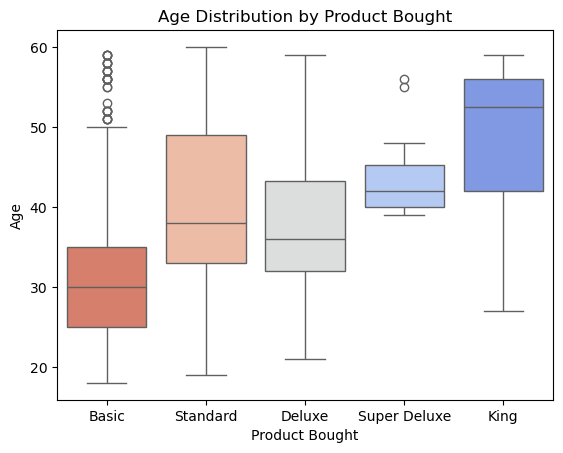

In [31]:
sns.boxplot(x='ProductPitched', y='Age', data=cust_df, palette='coolwarm_r')
plt.title('Age Distribution by Product Bought')
plt.xlabel('Product Bought')
plt.ylabel('Age')

**Insight:** The older generations tend to buy the more inclusive travel package.

Text(0.5, 0, 'Product Bought')

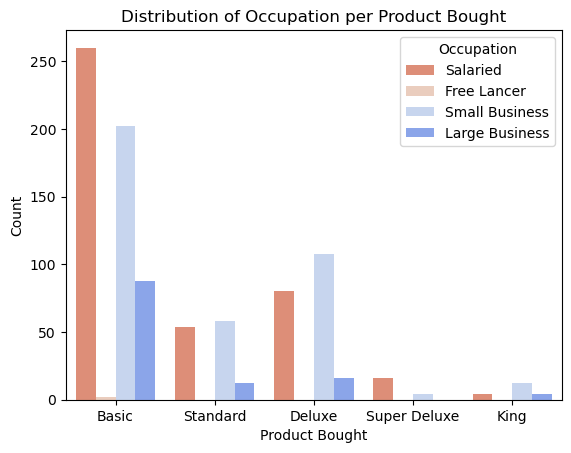

In [32]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r', hue = 'Occupation')
plt.title ('Distribution of Occupation per Product Bought')
plt.ylabel('Count')
plt.xlabel('Product Bought')

**Insight:** Basic and Deluxe are the most popular options among the Salaried, Small Business, and Large Business Owners. Free Lancers only bought Basic.

Text(0.5, 0, 'Product Bought')

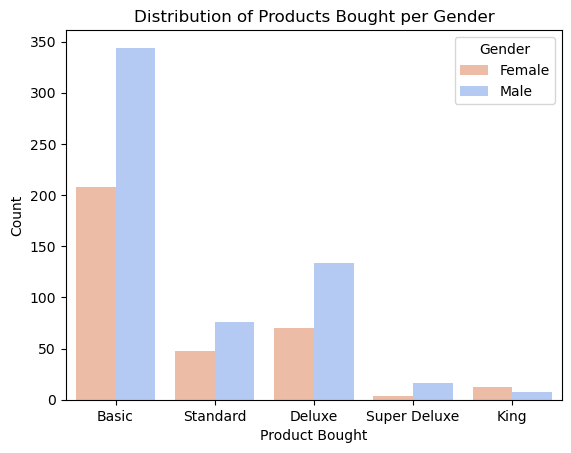

In [33]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r', hue = 'Gender')
plt.title ('Distribution of Products Bought per Gender')
plt.ylabel('Count')
plt.xlabel('Product Bought')

**Insight:** All types of products were bought by both both genders.

Text(0.5, 0, 'Product Bought')

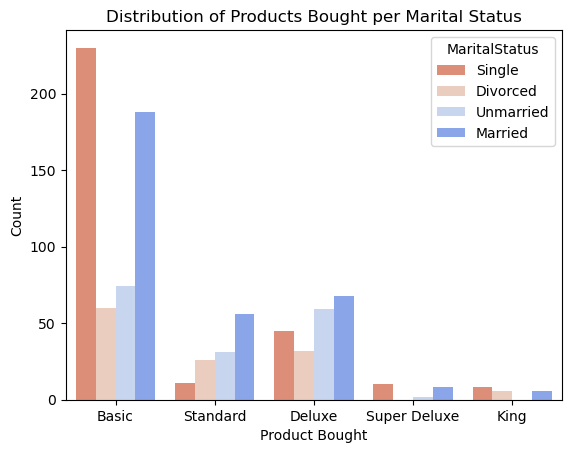

In [34]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r', hue = 'MaritalStatus')
plt.title ('Distribution of Products Bought per Marital Status')
plt.ylabel('Count')
plt.xlabel('Product Bought')

**Insight:** Basic is the most popular travel package especially for Single and Married customers. But the other packages were bought too, just in a lesser amount.

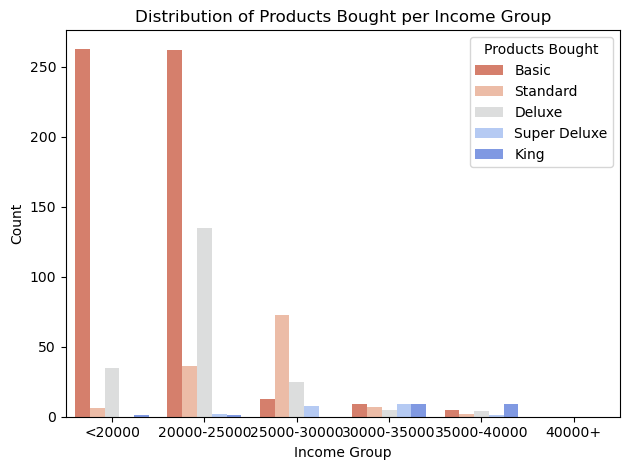

In [35]:
sns.countplot(data=cust_df, x='IncomeGroup', palette = 'coolwarm_r', hue = 'ProductPitched')
plt.title ('Distribution of Products Bought per Income Group')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Products Bought')
plt.tight_layout()

/var/folders/90/fy16vq9n2c1_hx322b65_2xw0000gn/T/ipykernel_20680/2680732943.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cust_df, x='ProductPitched', y='MonthlyIncome', palette = 'coolwarm_r', errorbar = None)


Text(0.5, 0, 'Products Bought')

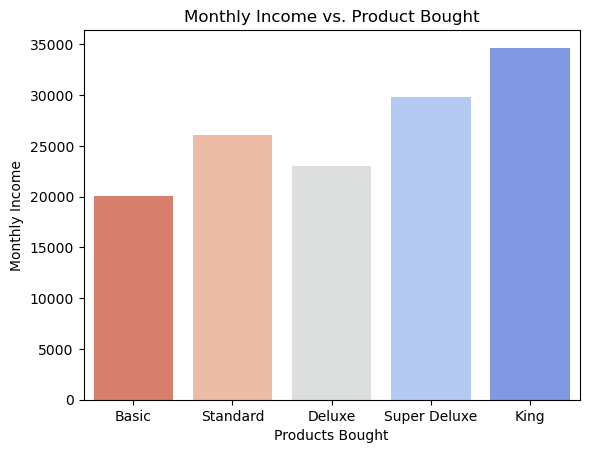

In [36]:
sns.barplot(data=cust_df, x='ProductPitched', y='MonthlyIncome', palette = 'coolwarm_r', errorbar = None)
plt.title ('Monthly Income vs. Product Bought')
plt.ylabel('Monthly Income')
plt.xlabel('Products Bought')

In [37]:
cust_df.groupby(['ProductPitched']).agg({
    'MonthlyIncome':['mean','median','min','max']})

/var/folders/90/fy16vq9n2c1_hx322b65_2xw0000gn/T/ipykernel_20680/2977398018.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_df.groupby(['ProductPitched']).agg({


MonthlyIncome                           
                        mean   median      min      max
ProductPitched                                         
Basic           20102.949275  20353.0  16009.0  37868.0
Standard        26035.419355  25711.0  17372.0  38395.0
Deluxe          22993.431373  22911.0  17086.0  38525.0
Super Deluxe    29823.800000  29802.5  21151.0  37502.0
King            34672.100000  34859.0  17517.0  38537.0

/var/folders/90/fy16vq9n2c1_hx322b65_2xw0000gn/T/ipykernel_20680/938339063.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ProductPitched', y='MonthlyIncome', data=cust_df, palette='coolwarm_r')


Text(0, 0.5, 'Monthly Income')

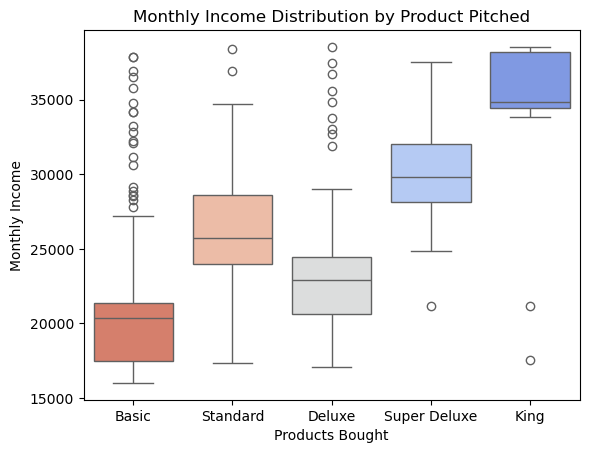

In [38]:
sns.boxplot(x='ProductPitched', y='MonthlyIncome', data=cust_df, palette='coolwarm_r')
plt.title('Monthly Income Distribution by Product Pitched')
plt.xlabel('Products Bought')
plt.ylabel('Monthly Income')

**Insight:** The higher the customer's Monthly Income, the better option of a travel package they bought - King.

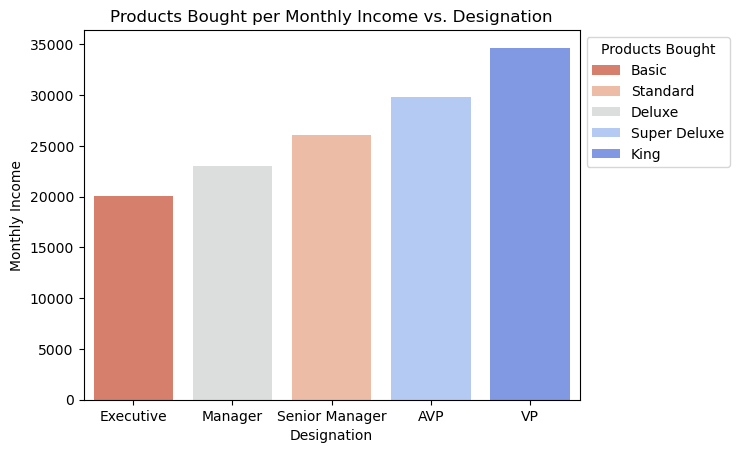

In [39]:
sns.barplot(data=cust_df, x='Designation', y='MonthlyIncome', palette = 'coolwarm_r', errorbar = None, hue = 'ProductPitched')
plt.title ('Products Bought per Monthly Income vs. Designation')
plt.ylabel('Monthly Income')
plt.xlabel('Designation')
plt.legend(title ='Products Bought',bbox_to_anchor=(1,1))

**Insight:** The King, an all-inclusive, travel package is bought by the highest earning Monthly Income by the VP, followed by the second-best, Super Deluxe, bought by the AVP. The Executive, with the lowest Monthly Income, bought only the Basic travel package. There is a positive correlation.

Text(0.5, 0, 'Products Bought')

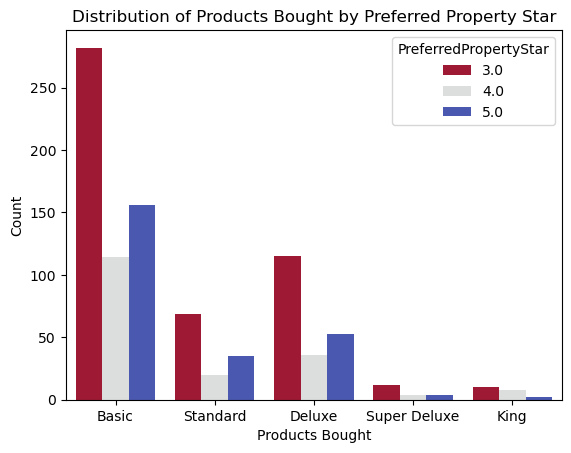

In [40]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r', hue = 'PreferredPropertyStar')
plt.title ('Distribution of Products Bought by Preferred Property Star')
plt.ylabel('Count')
plt.xlabel('Products Bought')

**Insight:** Most customers prefer a 3 star property, while some do perfer up to 4/5 stars too, in all travel packages.

Text(0.5, 0, 'Products Bought')

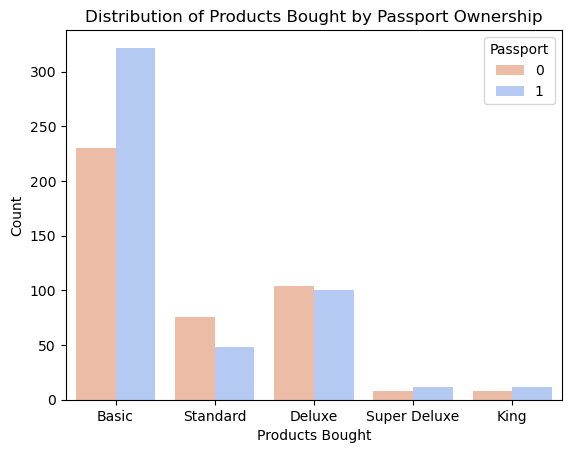

In [41]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r', hue = 'Passport')
plt.title ('Distribution of Products Bought by Passport Ownership')
plt.ylabel('Count')
plt.xlabel('Products Bought')

**Insight:** Most customers who bought the travel package owns a passport, except those who chose the Standard and Deluxe package.

Text(0.5, 0, 'Products Bought')

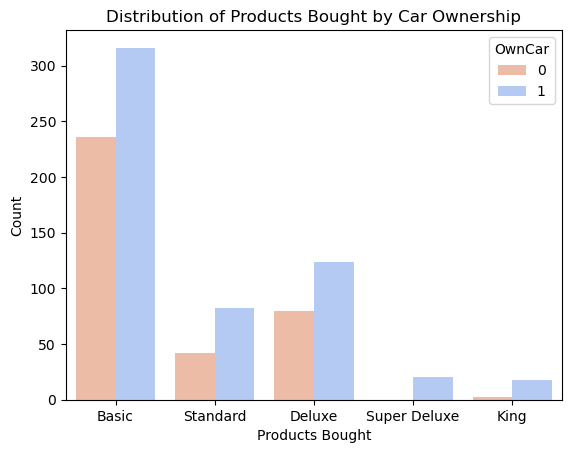

In [42]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r', hue = 'OwnCar')
plt.title ('Distribution of Products Bought by Car Ownership')
plt.ylabel('Count')
plt.xlabel('Products Bought')

**Insight:** Most customers who bought the travel package owns a car.

Text(0.5, 0, 'Products Bought')

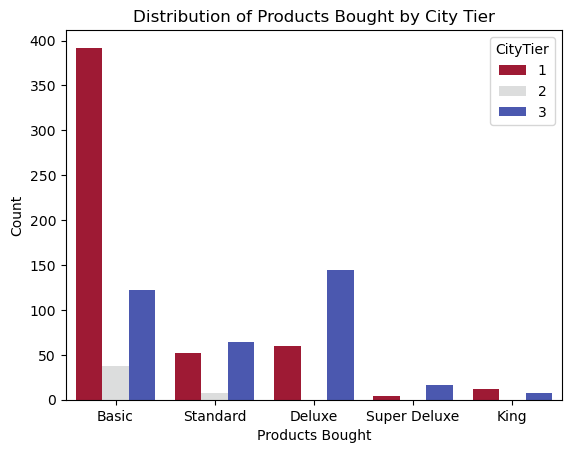

In [43]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r', hue = 'CityTier')
plt.title ('Distribution of Products Bought by City Tier')
plt.ylabel('Count')
plt.xlabel('Products Bought')

Text(0.5, 0, 'Products Bought')

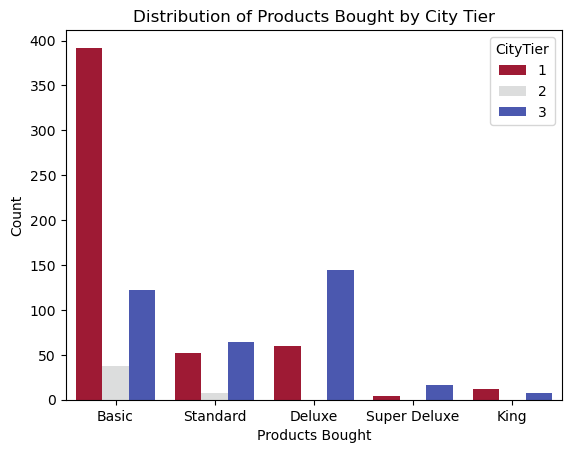

In [44]:
sns.countplot(data=cust_df, x='ProductPitched', palette = 'coolwarm_r', hue = 'CityTier')
plt.title ('Distribution of Products Bought by City Tier')
plt.ylabel('Count')
plt.xlabel('Products Bought')

**Insight:** Most customers are from City Tier 1 or City Tier 3. Less are from City Tier 2.

### Insights Summary: Customer Segmentation

1. **Target Basic Package Promotions**  
   Focus campaigns on the Basic package, which has the highest purchase rate. Emphasize affordability and value for new or price-sensitive customers.

2. **City Tier Segmentation**  
   Customers from City Tier 3 are most receptive. Allocate more marketing resources and personalized offers to less urban areas.

3. **Occupation-Based Targeting**  
   Freelancers and Large Business Owners are more likely to buy. Tailor campaigns and exclusive offers for these groups, highlighting flexibility and premium experiences.

4. **Group Travel Offers**  
   Purchasers typically travel in groups of 2–4. Promote group discounts and family/friends packages to encourage group bookings.

5. **Increase Follow-Ups**  
   More follow-ups lead to higher conversions. Implement automated and personalized follow-up strategies to nurture leads.

6. **Product Pitch Strategy**  
   Customers respond best to simpler, affordable packages. Train sales teams to start with the Basic package and upsell as interest grows.

7. **Property Star Preferences**  
   5-star properties are preferred, but not by a large margin. Offer a range of property options, highlighting value in premium segments.

8. **Gender-Neutral Campaigns**  
   Both genders are equally likely to purchase. Ensure marketing materials are inclusive and appeal to all genders.
